In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfre

In [ ]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
import string
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import warnings
warnings.filterwarnings('ignore')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    nltk.download('punkt_tab')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')


try:
    nltk.data.find('stemmers/snowball')
except LookupError:
    nltk.download('snowball_data')

print("Bibliothèques importées avec succès!")


Bibliothèques importées avec succès!


[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


## 1. Création d'une collection de documents texte


In [ ]:
documents = [
    "L'intelligence artificielle révolutionne le monde de la technologie. Les algorithmes d'apprentissage automatique permettent de résoudre des problèmes complexes.",
    "La cuisine française est réputée dans le monde entier. Les chefs utilisent des techniques traditionnelles et des ingrédients de qualité.",
    "Le sport est essentiel pour maintenir une bonne santé physique et mentale. L'exercice régulier améliore la condition cardiovasculaire.",
    "La musique classique a une histoire riche et complexe. Les compositeurs comme Mozart et Beethoven ont marqué l'histoire de l'art.",
    "L'environnement est un enjeu majeur de notre époque. La protection de la biodiversité nécessite des actions concrètes et durables.",
    "L'éducation joue un rôle fondamental dans le développement des sociétés. L'accès à l'éducation de qualité est un droit universel."
]

print(f"Nombre de documents: {len(documents)}")


Nombre de documents: 6


## 2. Préprocessing des documents (lowercase, nettoyage, stopwords)


In [ ]:

def preprocess_text(text):
    """
    Fonction de préprocessing du texte
    """
    # Conversion en minuscules
    text = text.lower()

    # Traitement des l et d apostrophe
    text = re.sub(r"\bl'", " ", text)
    text = re.sub(r"\bd'", " ", text)

    # Suppression de la ponctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenisation
    tokens = word_tokenize(text)

    # Suppression des stopwords français
    stop_words = set(stopwords.words('french'))
    tokens = [token for token in tokens if token not in stop_words]

    # Suppression des tokens trop courts (moins de 2 caractères) par example le a dans le verbe avoir au 4 document
    tokens = [token for token in tokens if len(token) > 2]

    # Stemming
    stemmer = SnowballStemmer('french')
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

preprocessed_docs = []
for i, doc in enumerate(documents):
    processed = preprocess_text(doc)
    preprocessed_docs.append(processed)
    print(f"Document {i+1} original: {doc}")
    print(f"Document {i+1} préprocessé: {processed}")
    print("-" * 50)

Document 1 original: L'intelligence artificielle révolutionne le monde de la technologie. Les algorithmes d'apprentissage automatique permettent de résoudre des problèmes complexes.
Document 1 préprocessé: ['intelligent', 'artificiel', 'révolution', 'mond', 'technolog', 'algorithm', 'apprentissag', 'automat', 'permettent', 'résoudr', 'problem', 'complex']
--------------------------------------------------
Document 2 original: La cuisine française est réputée dans le monde entier. Les chefs utilisent des techniques traditionnelles et des ingrédients de qualité.
Document 2 préprocessé: ['cuisin', 'français', 'réput', 'mond', 'enti', 'chef', 'utilisent', 'techniqu', 'traditionnel', 'ingrédient', 'qualit']
--------------------------------------------------
Document 3 original: Le sport est essentiel pour maintenir une bonne santé physique et mentale. L'exercice régulier améliore la condition cardiovasculaire.
Document 3 préprocessé: ['sport', 'essentiel', 'mainten', 'bon', 'sant', 'physiqu

## 3. Construction de la matrice Bag of Words


In [ ]:
# Conversion des documents préprocessés en texte pour CountVectorizer
documents_text = [' '.join(doc) for doc in preprocessed_docs]

# Construction de la matrice Bag of Words
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(documents_text)

print("Matrice Bag of Words:")
print(f"Forme de la matrice: {bow_matrix.shape}")
print(f"Nombre de documents: {bow_matrix.shape[0]}")
print(f"Nombre de mots dans le vocabulaire: {bow_matrix.shape[1]}")

# Affichage de la matrice sous forme de DataFrame
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vectorizer_bow.get_feature_names_out(),
    index=[f"Document {i+1}" for i in range(len(documents))]
)

print("\nMatrice Bag of Words (premiers mots):")
print(bow_df.iloc[:, :10])


Matrice Bag of Words:
Forme de la matrice: (6, 63)
Nombre de documents: 6
Nombre de mots dans le vocabulaire: 63

Matrice Bag of Words (premiers mots):
            acces  action  algorithm  amélior  art  artificiel  automat  \
Document 1      0       0          1        0    0           1        1   
Document 2      0       0          0        0    0           0        0   
Document 3      0       0          0        1    0           0        0   
Document 4      0       0          0        0    1           0        0   
Document 5      0       1          0        0    0           0        0   
Document 6      1       0          0        0    0           0        0   

            beethoven  biodivers  bon  
Document 1          0          0    0  
Document 2          0          0    0  
Document 3          0          0    1  
Document 4          1          0    0  
Document 5          0          1    0  
Document 6          0          0    0  


## 4. Construction de la matrice TF-IDF


In [ ]:
# Construction de la matrice TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(documents_text)

print("Matrice TF-IDF:")
print(f"Forme de la matrice: {tfidf_matrix.shape}")
print(f"Nombre de documents: {tfidf_matrix.shape[0]}")
print(f"Nombre de mots dans le vocabulaire: {tfidf_matrix.shape[1]}")

# Affichage de la matrice sous forme de DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer_tfidf.get_feature_names_out(),
    index=[f"Document {i+1}" for i in range(len(documents))]
)

print("\nMatrice TF-IDF (premiers mots):")
print(tfidf_df.iloc[:, :10])

# Affichage des scores TF-IDF les plus élevés pour chaque document
print("\nMots avec les scores TF-IDF les plus élevés par document:")
for i in range(len(documents)):
    doc_scores = tfidf_df.iloc[i].sort_values(ascending=False)
    top_words = doc_scores.head(5)
    print(f"\nDocument {i+1}:")
    for word, score in top_words.items():
        if score > 0:
            print(f"  {word}: {score:.3f}")


Matrice TF-IDF:
Forme de la matrice: (6, 63)
Nombre de documents: 6
Nombre de mots dans le vocabulaire: 63

Matrice TF-IDF (premiers mots):
               acces    action  algorithm   amélior       art  artificiel  \
Document 1  0.000000  0.000000   0.296893  0.000000  0.000000    0.296893   
Document 2  0.000000  0.000000   0.000000  0.000000  0.000000    0.000000   
Document 3  0.000000  0.000000   0.000000  0.288675  0.000000    0.000000   
Document 4  0.000000  0.000000   0.000000  0.000000  0.270444    0.000000   
Document 5  0.000000  0.316228   0.000000  0.000000  0.000000    0.000000   
Document 6  0.280912  0.000000   0.000000  0.000000  0.000000    0.000000   

             automat  beethoven  biodivers       bon  
Document 1  0.296893   0.000000   0.000000  0.000000  
Document 2  0.000000   0.000000   0.000000  0.000000  
Document 3  0.000000   0.000000   0.000000  0.288675  
Document 4  0.000000   0.270444   0.000000  0.000000  
Document 5  0.000000   0.000000   0.316228  0

## 5. Affichage du vocabulaire extrait


In [ ]:
# Extraction du vocabulaire
vocabulary = vectorizer_tfidf.get_feature_names_out()
vocabulary_list = list(vocabulary)

print("Vocabulaire extrait:")
print(f"Nombre total de mots uniques: {len(vocabulary_list)}")
print(f"Vocabulaire complet: {vocabulary_list}")

# Analyse de la fréquence des mots
word_frequencies = {}
for doc in preprocessed_docs:
    for word in doc:
        word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Tri par fréquence
sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

print(f"\nFréquence des mots dans tous les documents:")
for word, freq in sorted_words[:15]:
    print(f"{word}: {freq} occurrences")

print(f"\nStatistiques du vocabulaire:")
print(f"- Mots uniques: {len(vocabulary_list)}")
print(f"- Mots les plus fréquents: {[word for word, freq in sorted_words[:5]]}")
print(f"- Mots les moins fréquents: {[word for word, freq in sorted_words[-5:]]}")


Vocabulaire extrait:
Nombre total de mots uniques: 63
Vocabulaire complet: ['acces', 'action', 'algorithm', 'amélior', 'art', 'artificiel', 'automat', 'beethoven', 'biodivers', 'bon', 'cardiovasculair', 'chef', 'classiqu', 'comm', 'complex', 'compositeur', 'concret', 'condit', 'cuisin', 'dapprentissag', 'droit', 'durabl', 'développ', 'enjeu', 'enti', 'environ', 'essentiel', 'exercic', 'fondamental', 'français', 'histoir', 'ingrédient', 'intelligent', 'jou', 'mainten', 'majeur', 'marqu', 'mental', 'mond', 'mozart', 'musiqu', 'nécessit', 'permettent', 'physiqu', 'problem', 'protect', 'qualit', 'rich', 'réguli', 'réput', 'résoudr', 'révolution', 'rôl', 'sant', 'societ', 'sport', 'techniqu', 'technolog', 'traditionnel', 'universel', 'utilisent', 'éduc', 'époqu']

Fréquence des mots dans tous les documents:
mond: 2 occurrences
complex: 2 occurrences
qualit: 2 occurrences
histoir: 2 occurrences
éduc: 2 occurrences
intelligent: 1 occurrences
artificiel: 1 occurrences
révolution: 1 occurrences

## 6. Utilisation de Word2Vec pour les mots et visualisation 3D


In [ ]:
# Entraînement du modèle Word2Vec
print("Entraînement du modèle Word2Vec...")
model = Word2Vec(
    sentences=preprocessed_docs,
    vector_size=100,  # Dimension des vecteurs
    window=5,         # Taille de la fenêtre contextuelle
    min_count=1,
    workers=4,
    epochs=100
)

print(f"Taille du vocabulaire: {len(model.wv.key_to_index)}")
print(f"Dimension des vecteurs: {model.wv.vector_size}")

# Sélection des mots les plus fréquents pour la visualisation
top_words = [word for word, freq in sorted_words[:20]]
print(f"Mots sélectionnés pour la visualisation: {top_words}")

# Extraction des vecteurs pour les mots sélectionnés
word_vectors = []
valid_words = []
for word in top_words:
    if word in model.wv:
        word_vectors.append(model.wv[word])
        valid_words.append(word)

word_vectors = np.array(word_vectors)
print(f"Nombre de mots avec vecteurs valides: {len(valid_words)}")


Entraînement du modèle Word2Vec...
Modèle Word2Vec entraîné!
Taille du vocabulaire: 63
Dimension des vecteurs: 100
Mots sélectionnés pour la visualisation: ['mond', 'complex', 'qualit', 'histoir', 'éduc', 'intelligent', 'artificiel', 'révolution', 'technolog', 'algorithm', 'dapprentissag', 'automat', 'permettent', 'résoudr', 'problem', 'cuisin', 'français', 'réput', 'enti', 'chef']
Nombre de mots avec vecteurs valides: 20


Variance expliquée par les 3 composantes principales: [0.09636257 0.09062018 0.08093422]
Variance totale expliquée: 0.268


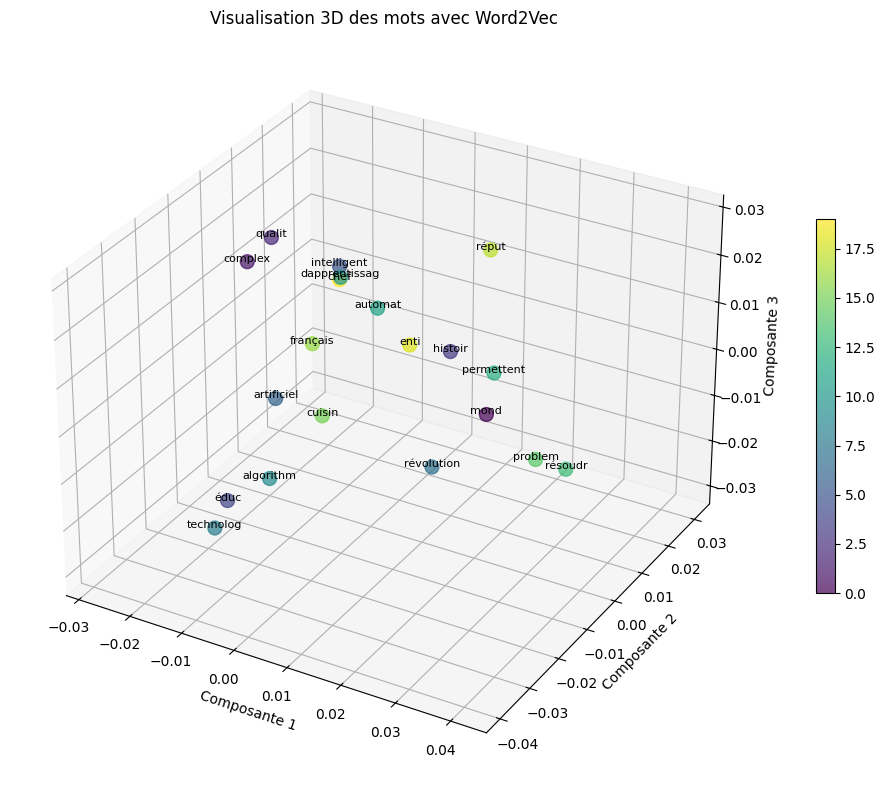


Similarités entre mots (exemples):
Mots similaires à 'sport': [('condit', 0.2380555421113968), ('chef', 0.22007492184638977), ('artificiel', 0.21862831711769104)]


In [ ]:
# Réduction de dimension avec PCA pour visualisation 3D
pca = PCA(n_components=3)
word_vectors_3d = pca.fit_transform(word_vectors)

print(f"Variance expliquée par les 3 composantes principales: {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée: {sum(pca.explained_variance_ratio_):.3f}")

# Visualisation 3D des mots avec Word2Vec
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(word_vectors_3d[:, 0], word_vectors_3d[:, 1], word_vectors_3d[:, 2],
                    c=range(len(valid_words)), cmap='viridis', s=100, alpha=0.7)

for i, word in enumerate(valid_words):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2],
            word, fontsize=8, ha='center')

ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')
ax.set_title('Visualisation 3D des mots avec Word2Vec')

plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)

plt.tight_layout()
plt.show()

print("\nSimilarités entre mots (exemples):")
test_words = ['intelligence', 'technologie', 'sport', 'musique']
for word in test_words:
    if word in model.wv:
        similar = model.wv.most_similar(word, topn=3)
        print(f"Mots similaires à '{word}': {similar}")


## 7. Utilisation de MiniLM (sentence-transformers) pour les phrases et visualisation 3D


In [ ]:
# Chargement du modèle MiniLM
model_minilm = SentenceTransformer('all-MiniLM-L6-v2')

# Encodage des documents originaux (avant préprocessing) avec MiniLM
sentence_embeddings = model_minilm.encode(documents)

print(f"Forme des embeddings de phrases: {sentence_embeddings.shape}")
print(f"Dimension des embeddings: {sentence_embeddings.shape[1]}")

# Réduction de dimension avec PCA pour visualisation 3D
pca_sentences = PCA(n_components=3)
sentence_embeddings_3d = pca_sentences.fit_transform(sentence_embeddings)

print(f"Variance expliquée par les 3 composantes principales: {pca_sentences.explained_variance_ratio_}")
print(f"Variance totale expliquée: {sum(pca_sentences.explained_variance_ratio_):.3f}")


Forme des embeddings de phrases: (6, 384)
Dimension des embeddings: 384
Variance expliquée par les 3 composantes principales: [0.25985909 0.2314753  0.18413143]
Variance totale expliquée: 0.675


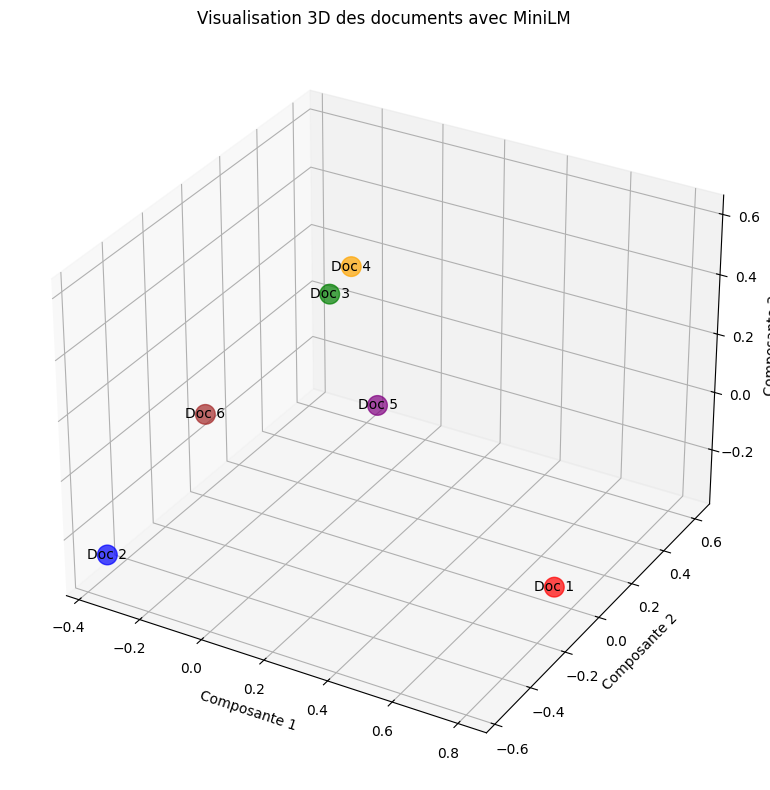


Matrice de similarité entre documents (MiniLM):
            Document 1  Document 2  Document 3  Document 4  Document 5  \
Document 1       1.000       0.137       0.223       0.313       0.180   
Document 2       0.137       1.000       0.308       0.299       0.212   
Document 3       0.223       0.308       1.000       0.418       0.426   
Document 4       0.313       0.299       0.418       1.000       0.284   
Document 5       0.180       0.212       0.426       0.284       1.000   
Document 6       0.184       0.352       0.360       0.357       0.316   

            Document 6  
Document 1       0.184  
Document 2       0.352  
Document 3       0.360  
Document 4       0.357  
Document 5       0.316  
Document 6       1.000  

Documents les plus similaires:
Document 1 est le plus similaire au Document 4 (similarité: 0.313)
Document 2 est le plus similaire au Document 6 (similarité: 0.352)
Document 3 est le plus similaire au Document 5 (similarité: 0.426)
Document 4 est le plus s

In [ ]:
# Visualisation 3D des documents avec MiniLM
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
scatter = ax.scatter(sentence_embeddings_3d[:, 0], sentence_embeddings_3d[:, 1], sentence_embeddings_3d[:, 2],
                    c=colors, s=200, alpha=0.7)

for i, (x, y, z) in enumerate(sentence_embeddings_3d):
    ax.text(x, y, z, f'Doc {i+1}', fontsize=10, ha='center', va='center')

ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')
ax.set_title('Visualisation 3D des documents avec MiniLM')

plt.tight_layout()
plt.show()

print("\nMatrice de similarité entre documents (MiniLM):")
similarity_matrix = np.dot(sentence_embeddings, sentence_embeddings.T)
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=[f"Document {i+1}" for i in range(len(documents))],
    columns=[f"Document {i+1}" for i in range(len(documents))]
)
print(similarity_df.round(3))

print("\nDocuments les plus similaires:")
for i in range(len(documents)):
    similarities = similarity_matrix[i]
    similarities[i] = 0
    most_similar_idx = np.argmax(similarities)
    print(f"Document {i+1} est le plus similaire au Document {most_similar_idx+1} (similarité: {similarities[most_similar_idx]:.3f})")


## Comparaison des méthodes et conclusion


In [ ]:
# Comparaison des différentes approches
print("=== COMPARAISON DES MÉTHODES ===\n")

print("1. BAG OF WORDS:")
print(f"   - Vocabulaire: {len(vocabulary_list)} mots")
print(f"   - Matrice: {bow_matrix.shape}")


print("2. TF-IDF:")
print(f"   - Vocabulaire: {len(vocabulary_list)} mots")
print(f"   - Matrice: {tfidf_matrix.shape}")


print("3. WORD2VEC:")
print(f"   - Vocabulaire: {len(model.wv.key_to_index)} mots")
print(f"   - Dimension des vecteurs: {model.wv.vector_size}")


print("4. MINILM (SENTENCE-TRANSFORMERS):")
print(f"   - Dimension des embeddings: {sentence_embeddings.shape[1]}")


# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': '3d'})

# Plot 1: Word2Vec
ax1 = axes[0]
scatter1 = ax1.scatter(word_vectors_3d[:, 0], word_vectors_3d[:, 1], word_vectors_3d[:, 2],
                      c=range(len(valid_words)), cmap='viridis', s=100, alpha=0.7)
for i, word in enumerate(valid_words):
    ax1.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2],
            word, fontsize=8, ha='center')
ax1.set_title('Word2Vec - Mots')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Plot 2: MiniLM
ax2 = axes[1]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
scatter2 = ax2.scatter(sentence_embeddings_3d[:, 0], sentence_embeddings_3d[:, 1], sentence_embeddings_3d[:, 2],
                      c=colors, s=200, alpha=0.7)
for i, (x, y, z) in enumerate(sentence_embeddings_3d):
    ax2.text(x, y, z, f'Doc {i+1}', fontsize=10, ha='center', va='center')
ax2.set_title('MiniLM - Documents')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.tight_layout()
plt.show()

